In [1]:
import geopandas
import pandas
import zarr
import xarray
import numpy as np
import dask
import pyproj
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
region = 'UCSB'
zarr_store = f'/data/sentinel2/zarrs_v3/{region}_final.zarr'
ds = xarray.open_zarr(zarr_store)

In [3]:
ds = ds.sortby('time')

# Apply cloud filter

In [4]:
variable = 'fsca'

In [5]:
ds[variable].isel(time=5).isnull().sum()

<xarray.DataArray 'fsca' ()> Size: 8B
dask.array<sum-aggregate, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>
Coordinates:
    spatial_ref  int64 8B ...
    time         datetime64[ns] 8B 2016-04-14

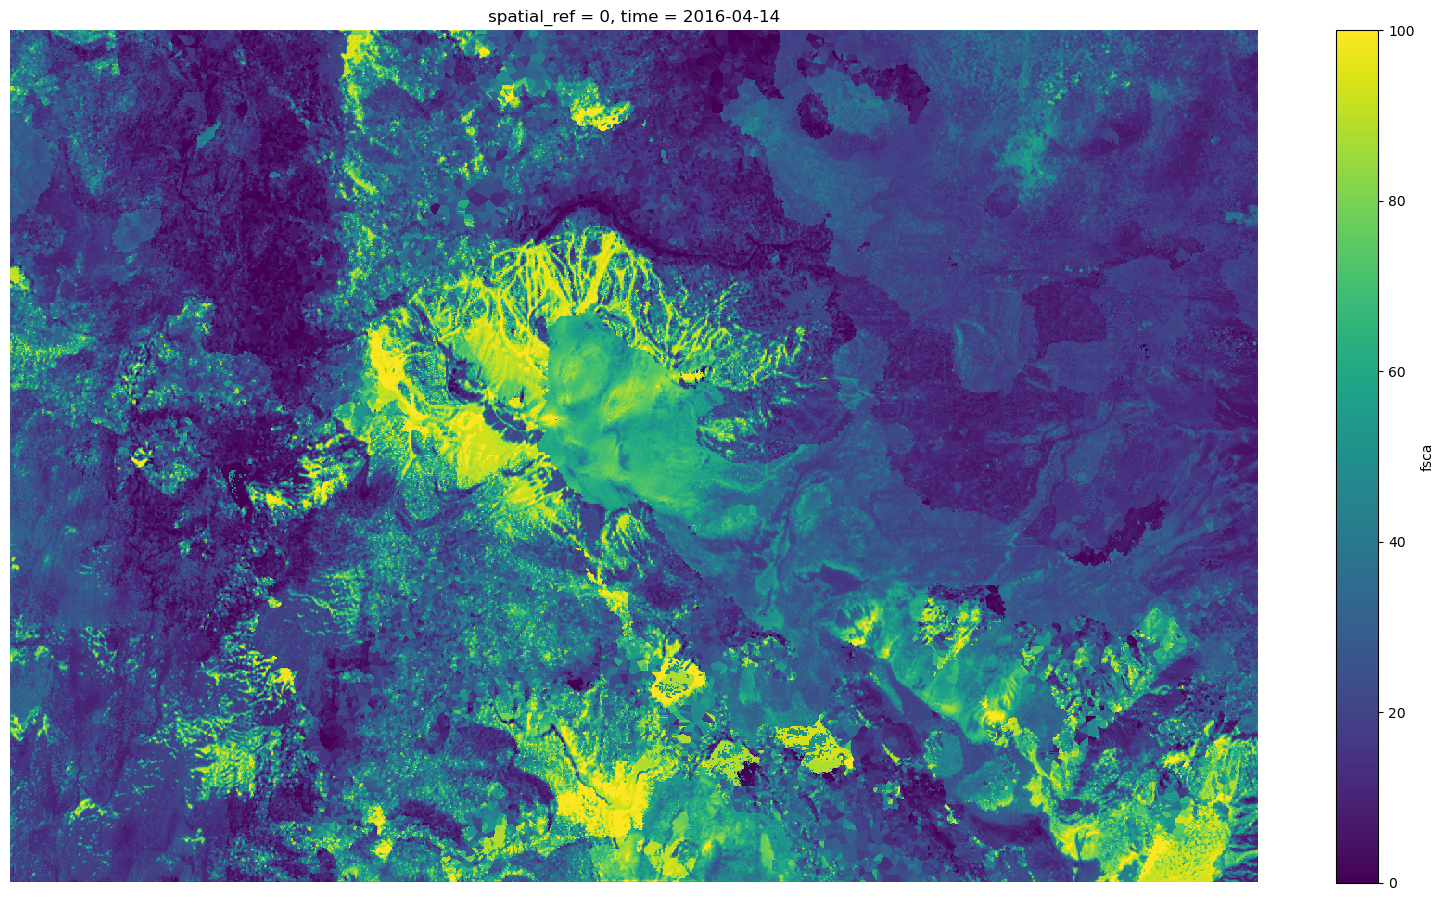

In [6]:
fig, ax = plt.subplots(figsize=(16, 9), dpi=100)

margin = 0.05
fig.subplots_adjust(left=margin, right=1-margin, top=1-margin, bottom=margin)
im = ds[variable].isel(time=5).plot.imshow(ax=ax, add_colorbar=True, xticks=[], yticks=[], add_labels=True)

ax.set_aspect('equal')
ax.axis('off')
fig.tight_layout()

# Animation

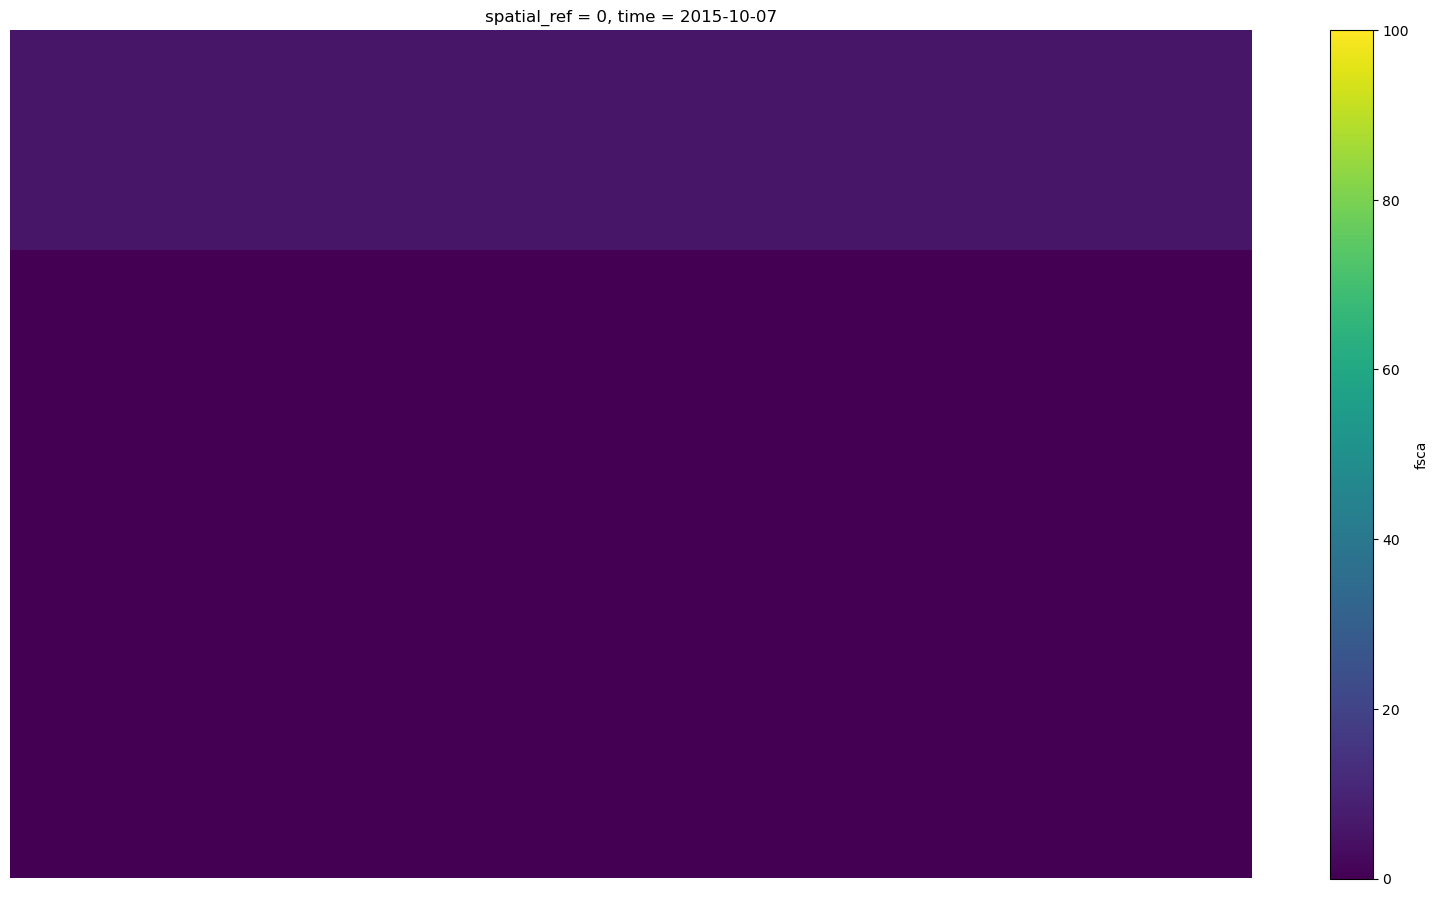

In [7]:
fig, ax = plt.subplots(figsize=(16, 9), dpi=100)

im = ds[variable].isel(time=0).plot.imshow(ax=ax, add_colorbar=True, vmin=0, vmax=100)

def update(frame):    
    im = ds[variable].isel(time=frame).plot.imshow(ax=ax, add_colorbar=False, vmin=0, vmax=100)        
    ax.set_aspect('equal')
    ax.axis('off')
    return [im]
    
anim = FuncAnimation(fig, update, frames=len(ds.time), interval=200, blit=True, repeat=True)
fig.tight_layout()
plt.show()

In [8]:
%%time
anim.save(f'{region}_{variable}.mp4', fps=5, extra_args=['-vcodec', 'libx264'])

In [ ]:
plt.close()

In [9]:
1

1